In [1]:
#Import needed packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read in DF of significant QTL (Output from R)
data = pd.read_csv('C:/Users/segraha3/Desktop/CS590/data.csv')
data.head()

,Unnamed: 0,LG,Marker int. in LG,Position in int.,Cummulative Position,log liklihood under HO,log liklihood under H1,LR,QTL model,AIC,...,mu2,matrix sigma,threshold,env,Position,NearestMarker,cluster,min,max,peak
0,58,1,39.0,1.01,40.53,-161.0533,-151.9002,18.3062,1,339.8005,...,3.6020,0.7591,17.654935,WK,40.529,NaN,0,40.529,40.529,40.529
1,59,1,NaN,NaN,42.71,-161.0533,-148.5872,24.9321,1,333.1745,...,3.6493,0.7438,17.654935,WK,42.711,NaN,1,42.711,44.433,42.711
2,67,1,NaN,NaN,48.31,-161.0533,-143.1788,35.7491,1,322.3576,...,3.6673,0.7216,17.654935,WK,48.306,NaN,2,45.508,52.366,48.306
3,73,1,128.0,0.01,82.69,-154.3739,-143.2672,22.2135,1,322.5344,...,2.2778,0.7218,17.654935,WK,82.694,NaN,3,82.694,82.694,82.694
4,74,1,146.0,0.01,94.03,-155.8461,-143.1889,25.3145,1,322.3777,...,3.6547,0.7212,17.654935,WK,94.033,NaN,4,94.033,94.033,94.033


In [3]:
#Divide based on which parent QTL is mapped to
raleigh = data[data['QTL model'] == 2]
raleigh.head
seville = data[data['QTL model'] == 1]
seville.head

<bound method NDFrame.head of      Unnamed: 0  LG  Marker int. in LG  Position in int.  \
0            58   1               39.0              1.01   
1            59   1                NaN               NaN   
2            67   1                NaN               NaN   
3            73   1              128.0              0.01   
4            74   1              146.0              0.01   
5           112   2                NaN               NaN   
6           155   2               11.0              0.01   
7           216   2               56.0              0.01   
9           144   3               50.0              0.01   
10          146   3                NaN               NaN   
11          158   3                NaN               NaN   
12          159   3              102.0              0.01   
13          160   3              104.0              0.01   
14          161   3                NaN               NaN   
15          147   3              123.0              0.01   
16        

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

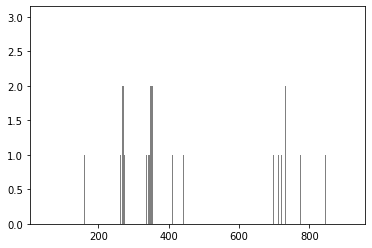

In [5]:
#Plot inline in Jupyter Notebooks
%matplotlib inline


In [6]:
#Create list of all unique environments
envs = seville.env.unique()
envs

array(['WK', 'SGU2015', 'SGU2013', 'SGU', 'SGU2014', 'WK2015', 'WK2014',
       'WK2013'], dtype=object)

In [16]:
#WK QTL for Seville
WK = seville[seville['env'] == 'WK']
WK.head()

,Unnamed: 0,LG,Marker int. in LG,Position in int.,Cummulative Position,log liklihood under HO,log liklihood under H1,LR,QTL model,AIC,...,mu2,matrix sigma,threshold,env,Position,NearestMarker,cluster,min,max,peak
0,58,1,39.0,1.01,40.53,-161.0533,-151.9002,18.3062,1,339.8005,...,3.6020,0.7591,17.654935,WK,40.529,NaN,0,40.529,40.529,40.529
1,59,1,NaN,NaN,42.71,-161.0533,-148.5872,24.9321,1,333.1745,...,3.6493,0.7438,17.654935,WK,42.711,NaN,1,42.711,44.433,42.711
2,67,1,NaN,NaN,48.31,-161.0533,-143.1788,35.7491,1,322.3576,...,3.6673,0.7216,17.654935,WK,48.306,NaN,2,45.508,52.366,48.306
3,73,1,128.0,0.01,82.69,-154.3739,-143.2672,22.2135,1,322.5344,...,2.2778,0.7218,17.654935,WK,82.694,NaN,3,82.694,82.694,82.694
4,74,1,146.0,0.01,94.03,-155.8461,-143.1889,25.3145,1,322.3777,...,3.6547,0.7212,17.654935,WK,94.033,NaN,4,94.033,94.033,94.033


In [17]:
#WK2015 QTL for Seville
WK2015 = seville[seville['env'] == 'WK2015']
WK2015.head()

,Unnamed: 0,LG,Marker int. in LG,Position in int.,Cummulative Position,log liklihood under HO,log liklihood under H1,LR,QTL model,AIC,...,mu2,matrix sigma,threshold,env,Position,NearestMarker,cluster,min,max,peak
21,1,3,147.0,0.01,271.97,-169.0446,-160.0528,17.9835,1,356.1056,...,2.9584,0.9400,17.86686,WK2015,63.567,NaN,0,63.567,63.567,63.567
23,2,3,151.0,0.01,273.01,-169.0446,-158.7631,20.5630,1,353.5262,...,2.9294,0.9482,17.86686,WK2015,64.608,NaN,1,64.608,64.608,64.608
28,3,4,28.0,0.01,338.66,-170.3887,-160.4012,19.9750,1,356.8024,...,4.0179,0.9753,17.86686,WK2015,27.527,NaN,0,27.527,27.527,27.527
29,4,4,NaN,NaN,341.62,-170.3887,-158.9917,22.7941,1,353.9834,...,3.9922,0.9508,17.86686,WK2015,30.490,NaN,1,30.490,30.913,30.490
38,8,4,NaN,NaN,348.40,-170.3887,-158.6980,23.3814,1,353.3960,...,4.0971,0.9460,17.86686,WK2015,37.265,NaN,2,36.775,37.995,37.265


In [18]:
#WK2014 QTL for Seville
WK2014 = seville[seville['env'] == 'WK2014']
WK2014.head()

,Unnamed: 0,LG,Marker int. in LG,Position in int.,Cummulative Position,log liklihood under HO,log liklihood under H1,LR,QTL model,AIC,...,mu2,matrix sigma,threshold,env,Position,NearestMarker,cluster,min,max,peak
134,55,8,NaN,NaN,731.72,-175.2754,-166.1018,18.3473,1,358.2035,...,3.8321,1.5633,16.892525,WK2014,41.045,NaN,0,40.67,41.045,41.045


In [19]:
#WK2013 QTL for Seville
WK2013 = seville[seville['env'] == 'WK2013']
WK2013.head()

,Unnamed: 0,LG,Marker int. in LG,Position in int.,Cummulative Position,log liklihood under HO,log liklihood under H1,LR,QTL model,AIC,...,mu2,matrix sigma,threshold,env,Position,NearestMarker,cluster,min,max,peak
135,57,8,NaN,NaN,731.72,-175.2754,-166.1018,18.3473,1,358.2035,...,3.8321,1.5633,17.19896,WK2013,41.045,NaN,0,40.67,41.045,41.045


In [20]:
#SGU QTL for Seville
SGU = seville[seville['env'] == 'SGU']
SGU.head()

,Unnamed: 0,LG,Marker int. in LG,Position in int.,Cummulative Position,log liklihood under HO,log liklihood under H1,LR,QTL model,AIC,...,mu2,matrix sigma,threshold,env,Position,NearestMarker,cluster,min,max,peak
7,216,2,56.0,0.01,161.46,-164.6743,-155.6888,17.9710,1,333.3775,...,1.4705,0.8628,16.297675,SGU,53.594,NaN,0,53.594,53.594,53.594
20,217,3,144.0,0.01,270.69,-168.0307,-156.0095,24.0423,1,334.0190,...,2.6356,0.8816,16.297675,SGU,62.285,NaN,0,62.285,62.285,62.285
27,218,4,26.0,0.01,336.75,-172.8478,-164.5767,16.5423,1,351.1534,...,2.3698,1.0224,16.297675,SGU,25.614,NaN,0,25.614,25.614,25.614
30,219,4,33.0,0.01,342.80,-172.8478,-164.4524,16.7909,1,350.9048,...,2.3324,1.0165,16.297675,SGU,31.663,NaN,1,31.663,31.663,31.663
35,220,4,38.0,0.01,344.96,-172.8478,-155.9407,33.8142,1,333.8815,...,2.6069,0.8800,16.297675,SGU,33.823,NaN,2,33.823,33.823,33.823


In [21]:
#SGU2015 QTL for Seville
SGU2015 = seville[seville['env'] == 'SGU2015']
SGU2015.head()

,Unnamed: 0,LG,Marker int. in LG,Position in int.,Cummulative Position,log liklihood under HO,log liklihood under H1,LR,QTL model,AIC,...,mu2,matrix sigma,threshold,env,Position,NearestMarker,cluster,min,max,peak
5,112,2,NaN,NaN,122.32,-119.4956,-108.9066,21.1781,1,253.8132,...,1.9445,0.3955,18.05513,SGU2015,14.463,NaN,0,14.252,14.463,14.463
69,113,5,38.0,0.01,437.85,-119.8072,-109.8263,19.9619,1,255.6525,...,2.7360,0.4017,18.05513,SGU2015,44.108,NaN,0,44.108,44.108,44.108
70,114,5,40.0,0.01,438.36,-119.8072,-109.2571,21.1003,1,254.5141,...,2.7235,0.3972,18.05513,SGU2015,44.615,NaN,1,44.615,44.615,44.615
71,117,5,NaN,NaN,439.37,-119.8072,-109.2670,21.0803,1,254.5340,...,2.7751,0.3980,18.05513,SGU2015,45.625,NaN,2,44.936,46.768,45.625
72,123,5,NaN,NaN,441.60,-119.8072,-108.9394,21.7356,1,253.8787,...,2.6864,0.3955,18.05513,SGU2015,47.855,NaN,3,47.574,47.855,47.855


In [22]:
##SGU2014 QTL for Seville
SGU2014 = seville[seville['env'] == 'SGU2014']
SGU2014.head()

,Unnamed: 0,LG,Marker int. in LG,Position in int.,Cummulative Position,log liklihood under HO,log liklihood under H1,LR,QTL model,AIC,...,mu2,matrix sigma,threshold,env,Position,NearestMarker,cluster,min,max,peak
9,144,3,50.0,0.01,230.77,-190.3405,-180.3500,19.9811,1,378.7000,...,2.7046,1.8775,15.672745,SGU2014,22.363,NaN,0,22.363,22.363,22.363
10,146,3,NaN,NaN,260.94,-191.9355,-184.0231,15.8247,1,386.0463,...,2.3707,2.0111,15.672745,SGU2014,52.535,NaN,1,52.430,52.535,52.535
15,147,3,123.0,0.01,267.07,-191.9355,-183.7166,16.4378,1,385.4332,...,2.4296,2.0030,15.672745,SGU2014,58.663,NaN,2,58.663,58.663,58.663
16,149,3,NaN,NaN,268.88,-191.9355,-179.7192,24.4325,1,377.4385,...,2.4895,1.8250,15.672745,SGU2014,60.474,NaN,3,60.402,60.613,60.474
18,151,3,139.0,0.01,269.55,-191.9355,-183.9912,15.8885,1,385.9825,...,2.3858,2.0116,15.672745,SGU2014,61.143,NaN,4,61.143,61.143,61.143


In [23]:
#SGU2013 QTL for Seville
SGU2013 = seville[seville['env'] == 'SGU2013']
SGU2013.head()

,Unnamed: 0,LG,Marker int. in LG,Position in int.,Cummulative Position,log liklihood under HO,log liklihood under H1,LR,QTL model,AIC,...,mu2,matrix sigma,threshold,env,Position,NearestMarker,cluster,min,max,peak
6,155,2,11.0,0.01,136.33,-168.2676,-152.7568,31.0216,1,341.5136,...,3.0153,1.0510,18.241475,SGU2013,28.465,NaN,0,28.465,28.465,28.465
11,158,3,NaN,NaN,260.94,-180.1375,-165.9993,28.2764,1,367.9986,...,2.8068,1.3789,18.241475,SGU2013,52.535,NaN,0,50.527,52.535,52.535
12,159,3,102.0,0.01,262.25,-180.1375,-170.5003,19.2744,1,377.0006,...,2.7333,1.4963,18.241475,SGU2013,53.846,NaN,1,53.846,53.846,53.846
13,160,3,104.0,0.01,263.18,-180.1375,-169.8317,20.6116,1,375.6634,...,2.7091,1.4862,18.241475,SGU2013,54.776,NaN,2,54.776,54.776,54.776
14,161,3,NaN,NaN,264.14,-180.1375,-168.2724,23.7301,1,372.5449,...,2.7939,1.4371,18.241475,SGU2013,55.732,NaN,3,55.732,56.070,55.732


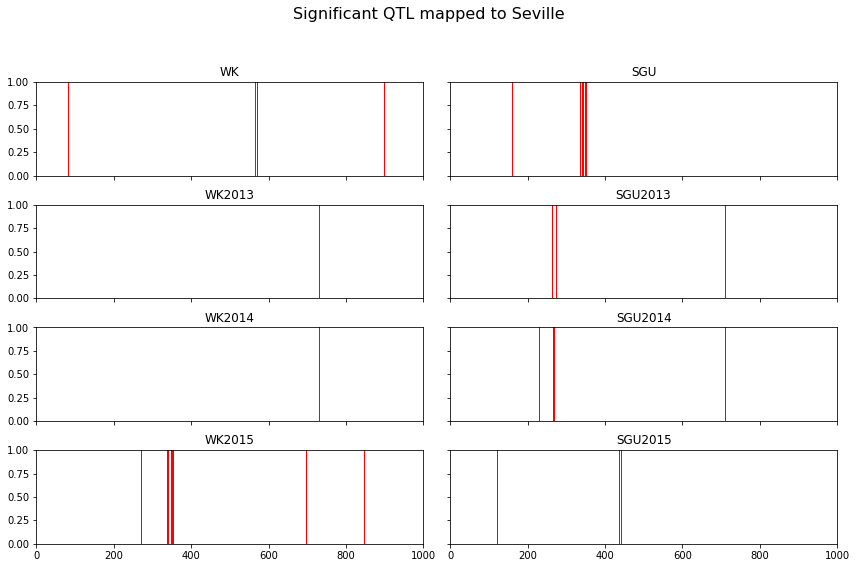

In [63]:
#Create object for figure with 8 subplots
fig, ax = plt.subplots(nrows=4, ncols=2, sharex = True, sharey = True, figsize = (12,8))

#Set ylim and xlim for all plots
xlim = (0,1000)
ylim = (0,1)
plt.setp(ax, xlim=xlim, ylim=ylim)

#Plot WK in first column of figure
ax[0,0].set_title('WK')
ax[0,0].hist(WK['Cummulative Position'], 1000, range=[0, 1000], facecolor='red', align='mid')
ax[1,0].set_title('WK2013')
ax[1,0].hist(WK2013['Cummulative Position'], 1000, range=[0, 1000], facecolor='red', align='mid')
ax[2,0].set_title('WK2014')
ax[2,0].hist(WK2014['Cummulative Position'], 1000, range=[0, 1000], facecolor='red', align='mid')
ax[3,0].set_title('WK2015')
ax[3,0].hist(WK2015['Cummulative Position'], 1000, range=[0, 1000], facecolor='red', align='mid')

#Plot SGU in second column of figure
ax[0,1].set_title('SGU')
ax[0,1].hist(SGU['Cummulative Position'], 1000, range=[0, 1000], facecolor='red', align='mid')
ax[1,1].set_title('SGU2013')
ax[1,1].hist(SGU2013['Cummulative Position'], 1000, range=[0, 1000], facecolor='red', align='mid')
ax[2,1].set_title('SGU2014')
ax[2,1].hist(SGU2014['Cummulative Position'], 1000, range=[0, 1000], facecolor='red', align='mid')
ax[3,1].set_title('SGU2015')
ax[3,1].hist(SGU2015['Cummulative Position'], 1000, range=[0, 1000], facecolor='red', align='mid')

#Add Main title of figure
fig.suptitle('Significant QTL mapped to Seville', fontsize = 16)

#Layout to avoid overlapping text
plt.tight_layout()
fig.subplots_adjust(top=0.85)

In [64]:
fig.savefig("SevilleQTL.png")